In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [18]:
tf.test.gpu_device_name()
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
df = dataset.drop(['Unnamed: 32'], axis=1 )
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df['diagnosis'] = df['diagnosis'].replace({ 'M' : 1 , 'B' : 0})

C:\Users\Pratham\AppData\Local\Temp\ipykernel_13772\3932643778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({ 'M' : 1 , 'B' : 0})


In [24]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:

df = df.rename(columns={'diagnosis' : 'target'})
columns_to_drop = ['target' , 'id']
X = df.drop(columns_to_drop , axis = 1)
columns = X.columns.tolist()

In [42]:
from sklearn.neighbors import LocalOutlierFactor

# Fit the LocalOutlierFactor model to your data
lof = LocalOutlierFactor()
lof.fit(X)

# Get the negative outlier factor scores
X_score = lof.negative_outlier_factor_

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color="k", s=3, label="Data Point")

# Calculate the radius for each point based on the outlier score
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

# Plot the points with sizes corresponding to the outlier score
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=1000 * radius, edgecolors="r", facecolors="none", label="Outlier Score")

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.grid(True)
plt.title('Outlier Detection using Local Outlier Factor (LOF)')
plt.show()

# Threshold for outlier detection
threshold_outlier = -2.5
filtre = X_score < threshold_outlier
outlier_index = np.where(filtre)[0]
print("Outlier indices:", outlier_index)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

<Figure size 800x600 with 0 Axes>

In [43]:
df.head()

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
X = df.iloc[:, 2:-1].values
y = df['target'].values

In [26]:
print(X)

[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]


In [27]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [28]:
!pip install scikit-learn

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print(X_scaled)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.10952635  2.29607613
   2.75062224]
 [ 1.82982061 -0.35363241  1.68595471 ... -0.14674897  1.0870843
  -0.24388967]
 [ 1.57988811  0.45618695  1.56650313 ...  0.85497394  1.95500035
   1.152255  ]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.3267666   0.41406869
  -1.10454895]
 [ 1.83834103  2.33645719  1.98252415 ...  3.19760468  2.28998549
   1.91908301]
 [-1.80840125  1.22179204 -1.81438851 ... -1.30583065 -1.74506282
  -0.04813821]]


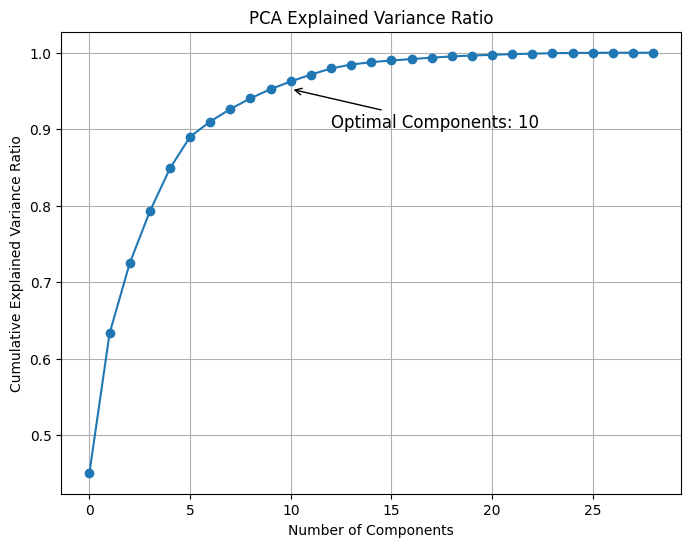

In [45]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Find the optimal number of components
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')

# Annotate the plot with the optimal number of components
plt.annotate(f'Optimal Components: {optimal_components}', 
             xy=(optimal_components, cumulative_variance_ratio[optimal_components-1]),
             xytext=(optimal_components + 2, cumulative_variance_ratio[optimal_components-1] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)

plt.grid(True)
plt.show()

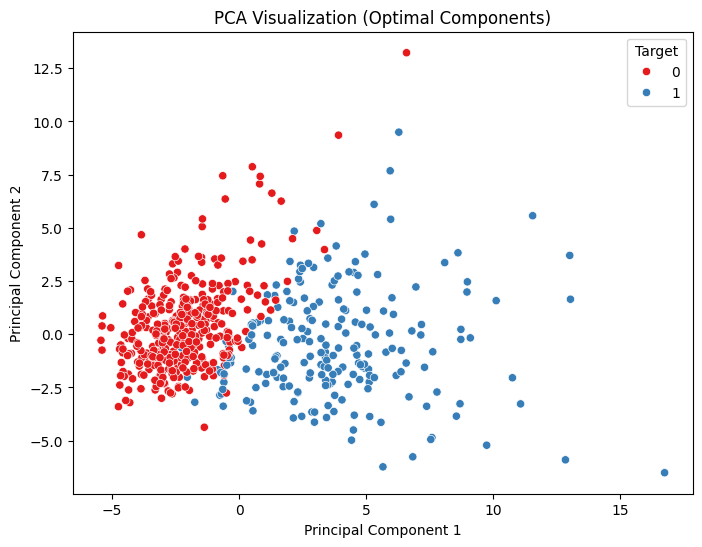

In [46]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame to hold the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 11)])

# Concatenate principal components with the target variable
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['target'])], axis=1)

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=final_df, palette='Set1')
plt.title('PCA Visualization (Optimal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='upper right')
plt.show()

In [50]:
print(principal_components.shape)
print(y)

(569, 10)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 

In [51]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(principal_components,y,test_size=0.1,random_state=42)

In [54]:
print(X_train.shape)

(512, 10)


In [53]:
print(X_test.shape)

(57, 10)


In [55]:
print(y_train.shape)

(512,)


In [56]:
print(y_test.shape)

(57,)


In [60]:
X_train = X_train.reshape(512,10,1)
X_test = X_test.reshape(57,10,1)

In [61]:
print(X_train.shape)

(512, 10, 1)


In [64]:
cnn = Sequential()
cnn.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(10,1)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv1D(32,2,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(32,activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(1,activation='sigmoid'))

In [65]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 9, 16)             48        
                                                                 
 batch_normalization_2 (Batc  (None, 9, 16)            64        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 9, 16)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 8, 32)             1056      
                                                                 
 batch_normalization_3 (Batc  (None, 8, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 8, 32)            

In [66]:
cnn.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
history = cnn.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
16/16 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.9258 - val_loss: 0.1828 - val_accuracy: 0.9123
Epoch 2/35
16/16 [==============================] - 0s 5ms/step - loss: 0.1921 - accuracy: 0.9316 - val_loss: 0.1797 - val_accuracy: 0.9123
Epoch 3/35
16/16 [==============================] - 0s 4ms/step - loss: 0.1839 - accuracy: 0.9355 - val_loss: 0.1767 - val_accuracy: 0.9123
Epoch 4/35
16/16 [==============================] - 0s 4ms/step - loss: 0.2058 - accuracy: 0.9160 - val_loss: 0.1741 - val_accuracy: 0.9123
Epoch 5/35
16/16 [==============================] - 0s 4ms/step - loss: 0.1946 - accuracy: 0.9219 - val_loss: 0.1716 - val_accuracy: 0.9123
Epoch 6/35
16/16 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.9180 - val_loss: 0.1694 - val_accuracy: 0.9123
Epoch 7/35
16/16 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9297 - val_loss: 0.1663 - val_accuracy: 0.9123
Epoch 8/35
16/16 [==

In [69]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

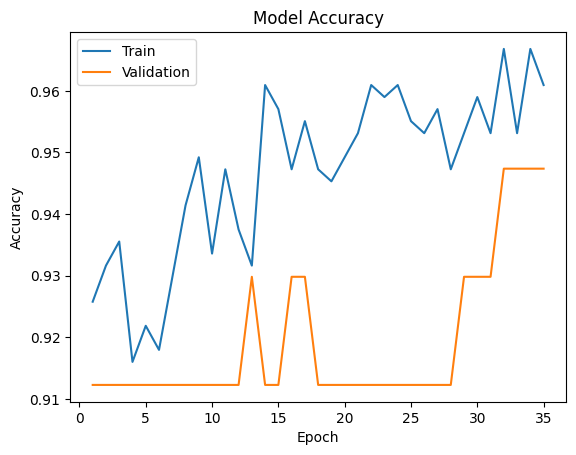

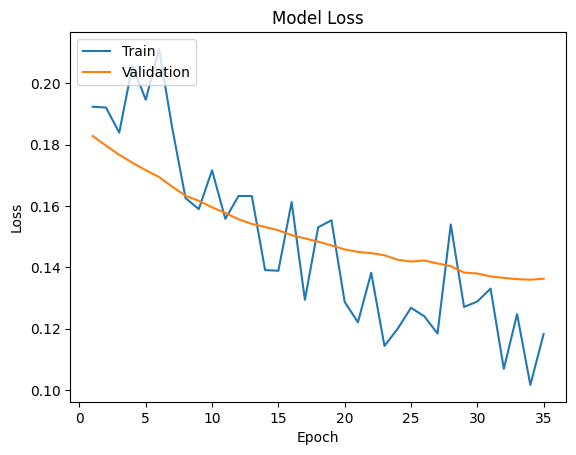

In [70]:
plotLearningCurve(history,35)

In [79]:
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


2/2 [==============================] - 0s 8ms/step
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[38  2]
 [ 1 16]]


0.9473684210526315